## Modelling text through character-level bigrams

In [50]:
names = [line.rstrip() for line in open("../data/streets_zh.txt")]
names[:5]

['Aargauerstrasse',
 'Abeggweg',
 'Abendweg',
 'Ackermannstrasse',
 'Ackersteinstrasse']

In [51]:
# Add $ to mark beginning and ending of names
for i in range(len(names)):
    names[i] = "$" + names[i] + "$"

In [52]:
chars = set()
bigrams = set()
freq = dict()
for street in names:
    for pair in zip(street, street[1:]):
            chars.add(pair[0])
            bigrams.add(pair)
            freq[pair] = 1+freq.get(pair, 0)

In [53]:
freq_per_char = {i : dict() for i in chars}
for bigram, f in freq.items():
    i, j = bigram
    freq_per_char[i][j] = f

In [54]:
# normalize
for k in freq_per_char.keys():
    total = sum(list(freq_per_char[k].values()))
    for v in freq_per_char[k]:
        freq_per_char[k][v]/= total

In [6]:
from random import choices

for _ in range(100):
    gen = ["$"]
    for _ in range(30):
        c = gen[-1]
        samples = list(freq_per_char[c].keys())
        p_samples = list(freq_per_char[c].values())
        next_c = choices(samples, p_samples)[0]
        gen.append(next_c)
        if next_c=="$":
            break
    print("".join(gen))
        

$Hikssendend$
$Drastrssse$
$Nerassei$
$Tasegedisstbütrserg$
$So-Wie$
$Sckengelenzenpassege$
$Hofsegelrinrlasse$
$Le$
$Bum Grssstrastrasediweldonn-St
$Stasseent-Sorastauerg$
$Hüderseile$
$Blerand-Plig$
$Stre-Wensenwie$
$Marngsterg$
$Immase$
$Belintr Godbholfwenselerg$
$Honmanbeibse$
$Deganenframühööfe$
$Etese$
$Imeleiechrrinsssssengweisestra
$Goke$
$Weingg$
$Laserlz$
$Mitrwise$
$Hatrti-Obühoordöbe$
$Tenièristrastorasstt-Geltraust
$Jug$
$Taf$
$Grhge$
$Bauwiroserattrambe$
$Sie$
$Doh-Senhuckeig$
$Autrnwe$
$Casstrn$
$Fönee$
$Sochascholdte$
$We$
$Eisstrse$
$Torlsieldeichasststenetrwe$
$Afasse$
$Könsqustrasse$
$Imenote$
$Vodeirauraslidhbe$
$Rinnwenenostrhännesteng$
$Zendeberassenendetrasllili-Efe
$Am dasesssströgastrasee$
$Emsstz$
$Hachssessse$
$Bllsensseg$
$Hol$
$Kietrdieraunfld-Plackstrenasen
$Strastg$
$Sie$
$Kre$
$Frweranssssstrasenne$
$Schseratraste$
$Bumgg$
$Javeraralbsbüste$
$Strstieg$
$Baufrass-Schlenhenstl-Beigg$
$Bessase$
$Masegwelgade$
$Basenenstrnssche$
$Zirisselllstrin$
$Ede$
$Kab

## Use a smarter way to tokenize 

In [7]:
#In every iteration step (Byte-pair encoding): 
# 1. find most commmon pair
# 2. merge them and add to vocabulary
# 3. get counts on new vocabulary

new_tokens = set()
n_iterations = 12
names2 = names.copy()
vocab2 = set()
bigrams2 = set()
freq2 = freq.copy()

for n in range(n_iterations):
    #1
    new_token, _ = sorted(list(freq2.items()), key= lambda x: x[1])[-1]
    print(f"{new_token=}")
    #2
    new_tokens.add("".join(new_token))

    # need to treat words in wordlist as list of chars so we can handle merged tokens
    new_names = names.copy()
    temp_list = []
    for i, street in enumerate(names2):
        temp = []
        skip = False
        for i in range(len(street)-1):
            if skip:
                skip = False
                continue
            if new_token == (street[i], street[i+1]):
                temp.append("".join(new_token))
                skip = True
            else:
                temp.append(street[i])
        temp_list.append(temp+[street[-1]] if temp[-1][-1]!="$" else temp)
    names2 = temp_list
    
    # create count of tokens
    freq2 = dict()
    for street in names2:
        for pair in zip(street, street[1:]):
                vocab2.add(pair[0])
                bigrams2.add(pair)
                freq2[pair] = 1+freq2.get(pair, 0)
    freq_per_char2 = {i : dict() for i in vocab2}
    for bigram, f in freq2.items():
        i, j = bigram
        freq_per_char2[i][j] = f
    

new_token=('s', 'e')
new_token=('a', 's')
new_token=('as', 'se')
new_token=('asse', '$')
new_token=('s', 't')
new_token=('r', 'asse$')
new_token=('st', 'rasse$')
new_token=('e', 'r')
new_token=('e', 'n')
new_token=('g', '$')
new_token=('e', 'g$')
new_token=('c', 'h')


In [8]:
for _ in range(100):
    gen = ["$"]
    for _ in range(30):
        c = gen[-1]
        samples = list(freq_per_char2[c].keys())
        p_samples = list(freq_per_char2[c].values())
        next_c = choices(samples, p_samples)[0]
        gen.append(next_c)
        if next_c[-1]=="$":
            break
    print("".join(gen))

$Spenplanhalatzweg$
$Neiassin$
$Alavegatpolkweg$
$Hinenstrasse$
$Sirgls$
$Sühlhm Tibenpppweg$
$Selstrasse$
$Schögasse$
$Beusibuläue$
$Gicheiepfenstrasse$
$Brmellig$
$Riggkagleistrasse$
$Lakerglstrasse$
$Oes$
$Ratzenanweg$
$Petthlieusckeshldstrasse$
$Bügstrasse$
$Käbrauneteseruschhoplanerwalergagw
$Weg$
$Kölad-We$
$Grastrasse$
$Machwageledatstrasse$
$Zwienken$
$Heiesenstrasse$
$Muhlergstrasse$
$Elingenastgasse$
$Uleipinkergstetlichstrasse$
$Schöckweg$
$Grchholzestegasse$
$Borm Korardwili-Rauber$
$Imooohat$
$Jus$
$Toschiweg$
$Weistrasse$
$Bastistesenstrasse$
$Sterhnanzstrasse$
$Ho-Schstrasse$
$Lustrasse$
$Butrasse$
$Bienstrasse$
$Zolbsm Stel$
$Säckenstergasse$
$Giadenstrasse$
$Histrasse$
$Maweg$
$Stlgstrasse$
$Gisenkstrasse$
$Geiz$
$Grstrasse$
$Gelmachtofickwimperenhös-Wo-Peichh
$Halbergatstrasse$
$Ileinditistrasse$
$Uleistrasse$
$Klf-Mos$
$Gweg$
$Honstrasse$
$Schbes$
$Wieiscomizesch-Sirldelllkitügweg$
$Lattz$
$Margstrasse$
$Bägstrasse$
$Bädhofalig$
$Bäckstrasse$
$Ungstrasse$
$Bühanelela

## How good is our model?

In [21]:
from math import log

In [22]:
total = 0
for street in names:
    likelihood = 1
    for pair in zip(street, street[1:]):
        likelihood *=  freq_per_char[pair[0]][pair[1]]
    total += -log(likelihood)
print(likelihood)
print(log(likelihood))
print(total/len(names))

8.974390446462344e-15
-32.3444013796715
29.491154302940576


In [294]:
total = 0
n_pairs = sum(list(freq.values()))
for street in names:
    likelihood = 1
    for pair in zip(street, street[1:]):
        total +=  -log(freq_per_char[pair[0]][pair[1]])
print(total/n_pairs)

2.0474445195968944


In [10]:
char2int = {c:i for i, c  in enumerate(chars)}

In [171]:
char2int = {c:i for i, c  in enumerate(chars)}
def char2vec (char: str) -> list:
    vec = [0] * len(chars)
    vec[char2int[char]] = 1
    return vec

In [30]:
import matplotlib.pyplot as plt

In [170]:
import torch
weights = torch.randn(size = [len(chars), len(chars)], requires_grad=True)

In [45]:
weights

tensor([[ 0.8542,  1.6341, -0.9087,  ...,  1.0051,  1.7089, -1.9063],
        [-0.0878, -0.1722,  0.4484,  ...,  0.1135, -1.0811, -1.3000],
        [ 2.6952,  0.5992, -0.5248,  ...,  0.7034, -0.6256, -0.3218],
        ...,
        [-3.2885,  0.9184, -1.2963,  ...,  0.4978,  0.0340,  1.2996],
        [-0.5769,  0.3745, -1.2531,  ...,  1.1820, -0.3220,  0.6932],
        [ 1.1058,  0.1241,  1.2118,  ...,  0.7787,  1.8137,  1.0891]],
       requires_grad=True)

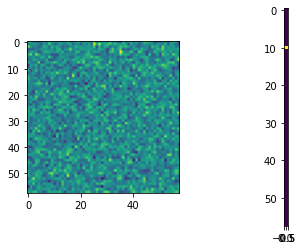

In [77]:
f, axes = plt.subplots(1, 2)
axes[0].imshow(weights.detach().numpy())
axes[1].imshow(torch.tensor(char2vec("a")).unsqueeze(1))

In [70]:
ax1.

In [72]:
plt.show()

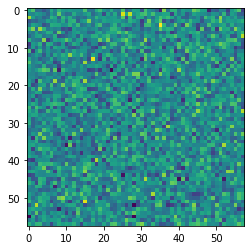

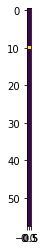

(<matplotlib.image.AxesImage at 0x7f993c835610>,
 None,
 None)

In [68]:
plt.imshow(weights.detach().numpy()),plt.show(), plt.imshow(torch.tensor(char2vec("a")).unsqueeze(1)), plt.show()

In [46]:
y = torch.matmul(weights, torch.tensor(char2vec("a")).float()) # Wx = y

In [85]:
y, len(y), len(chars)

(tensor([ 0.2264, -0.8310,  0.0731, -0.6908,  0.2430, -1.3981, -1.5117, -1.0392,
          1.8615, -1.6757, -0.4115,  0.4169,  0.5168,  0.6077, -0.6289, -0.5361,
          0.3855, -1.2618, -0.2099,  0.7454,  0.0957,  0.9333,  0.8738, -1.0651,
          1.3845, -1.8280,  0.1412, -0.2640,  0.2599, -0.4606, -0.3412,  0.7220,
         -0.3596,  0.9157,  0.3197, -0.9711, -3.0288,  0.7911, -1.4428,  0.1350,
         -1.1475,  1.8578,  0.0132, -0.5578,  0.5019, -0.4711,  0.1959, -1.6474,
          1.1596,  1.9210,  0.5266, -0.8558,  0.5192, -1.1770, -2.0402,  0.1239,
         -0.2872,  0.8384], grad_fn=<MvBackward0>),
 58,
 58)

In [83]:
char2int["a"]

10

In [84]:
weights[:, 10]

tensor([ 0.2264, -0.8310,  0.0731, -0.6908,  0.2430, -1.3981, -1.5117, -1.0392,
         1.8615, -1.6757, -0.4115,  0.4169,  0.5168,  0.6077, -0.6289, -0.5361,
         0.3855, -1.2618, -0.2099,  0.7454,  0.0957,  0.9333,  0.8738, -1.0651,
         1.3845, -1.8280,  0.1412, -0.2640,  0.2599, -0.4606, -0.3412,  0.7220,
        -0.3596,  0.9157,  0.3197, -0.9711, -3.0288,  0.7911, -1.4428,  0.1350,
        -1.1475,  1.8578,  0.0132, -0.5578,  0.5019, -0.4711,  0.1959, -1.6474,
         1.1596,  1.9210,  0.5266, -0.8558,  0.5192, -1.1770, -2.0402,  0.1239,
        -0.2872,  0.8384], grad_fn=<SelectBackward0>)

In [48]:
sum_y = y.sum()

In [52]:
sum_y.backward()

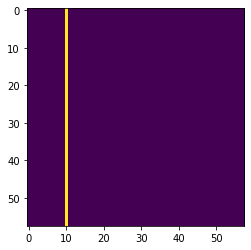

In [54]:
plt.imshow(weights.grad, a)

In [87]:
weights.grad #dsum_y/dweight[i, j]
# sum_y = weight[0, 11] + weight[1, 11] + weight[2, 11] + ...


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [374]:
g = torch.Generator().manual_seed(2147483647)
weights = torch.randn(size = (len(chars), len(chars)), requires_grad = True, generator=g)

In [172]:
for _ in range(5):
    total_loss = 0
    total_pairs = 0
    for name in names:
        for inp, out in zip(name, name[1:]):
            total_pairs += 1
            inp = torch.tensor(char2vec(inp)).float()
            out = torch.tensor(char2vec(out)).float()
            y = torch.matmul(weights, inp)
            y = y.exp()
            y = y/y.sum()
            pred = torch.matmul(out, y)
            pred = -pred.log()
            total_loss += pred
    
    total_loss = total_loss/total_pairs
    print("total_loss: ", total_loss)
    #update weights
    weights.grad = None
    total_loss.backward()
    
    weights.data = weights.data - 50*weights.grad
                        

total_loss:  tensor(5.1066, grad_fn=<DivBackward0>)


KeyboardInterrupt: 

In [186]:
embedding = torch.randn([len(chars), 2], requires_grad=True)
weights = torch.randn([2, len(chars)], requires_grad=True)

In [194]:
total_pairs = 0
inp_ = []
out_ = []
for name in names:
    for inp, out in zip(name, name[1:]):
        total_pairs += 1
        inp_.append(torch.tensor(char2vec(inp)).float())
        out_.append(torch.tensor(char2vec(out)).float())
inp_, out_ = torch.cat(inp_).reshape(-1, len(chars)), torch.cat(out_).reshape(-1, len(chars))
for _ in range(50):
    total_loss = 0
    y = torch.matmul(inp_, embedding)
    y = torch.matmul(y, weights)
    y = y.exp()
    y = y/y.sum(dim = 1, keepdim = True)
    pred = (y*out_).sum(dim=1)
    pred = -pred.log()
    total_loss += pred.mean()
    
    print("total_loss: ", total_loss)
    #update weights
    weights.grad = None
    total_loss.backward()

    weights.data = weights.data - 15*weights.grad

total_loss:  tensor(3.3248, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3196, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3173, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3319, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3246, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3349, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3206, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3334, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3222, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3343, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3215, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3340, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3217, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3342, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3216, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3341, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3216, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3342, grad_fn=<AddBackward0>)
total_loss:  tensor(3.3216, grad_fn=<AddBackward0>)
total_loss: 

In [385]:
x = torch.tensor(char2vec("a")).float()
y = torch.matmul(x, weights)
y = y.exp()
y = y/y.sum()

In [390]:
freq_per_char["a"]

{'r': 0.04895104895104895,
 'u': 0.047639860139860137,
 's': 0.5721153846153846,
 'n': 0.062062937062937064,
 'z': 0.0017482517482517483,
 't': 0.055944055944055944,
 'l': 0.05638111888111888,
 'c': 0.052884615384615384,
 'b': 0.008741258741258742,
 'w': 0.0026223776223776225,
 '-': 0.004370629370629371,
 'd': 0.015297202797202798,
 'h': 0.006118881118881119,
 'g': 0.010926573426573426,
 'i': 0.021853146853146852,
 'm': 0.0118006993006993,
 'e': 0.0013111888111888112,
 'p': 0.005244755244755245,
 'v': 0.0030594405594405595,
 'a': 0.0030594405594405595,
 'f': 0.004370629370629371,
 'k': 0.0021853146853146855,
 'x': 0.0013111888111888112}

In [394]:
y[char2int["d"]]

tensor(0.0150, grad_fn=<SelectBackward0>)

In [295]:
# create the dataset
xs, ys = [], []
for w in names:
  chs = ['$'] + list(w) + ['$']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = char2int[ch1]
    ix2 = char2int[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(chars), len(chars)), generator=g, requires_grad=True)

number of examples:  32939


In [288]:
sum(list(freq.values()))

28923

In [244]:
xenc.shape

torch.Size([32939, 58])

In [296]:
import torch.nn.functional as F
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=len(chars)).float() # input to the network: one-hot encoding
  logits = torch.matmul(xenc, W) # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

4.553882598876953
3.3619351387023926
3.0436625480651855
2.9034950733184814
2.8133544921875
2.743374824523926
2.6859023571014404
2.6373350620269775
2.595532178878784
2.5589983463287354
2.526674747467041
2.4977619647979736
2.4716901779174805
2.4480347633361816
2.4264872074127197
2.406806707382202
2.388793468475342
2.372288942337036
2.3571219444274902
2.343186855316162
2.330307722091675
2.318448781967163
2.3073978424072266
2.2972447872161865
2.2876646518707275
2.2789764404296875
2.270587205886841
2.2632503509521484
2.2557971477508545
2.2497994899749756
2.2429826259613037
2.2383666038513184
2.231786012649536
2.2285616397857666
2.221766471862793
2.219831943511963
2.2125017642974854
2.2116410732269287
2.2037434577941895
2.2037055492401123
2.195432186126709
2.1960065364837646
2.187593698501587
2.188632011413574
2.180248260498047
2.1816534996032715
2.173386573791504
2.175093412399292
2.1669774055480957
2.1689391136169434
2.160979747772217
2.163160800933838
2.1553502082824707
2.157721519470215


In [129]:
weights

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], requires_grad=True)

In [103]:
total/len(names)

tensor(62.5857, grad_fn=<DivBackward0>)

In [26]:
import torch
import torch.nn.functional as F
chars2int = {j:i for i,j in enumerate(chars)}

In [201]:
weights = torch.rand([len(chars), len(chars)], requires_grad=True)

In [170]:
out.min()

tensor(0., grad_fn=<MinBackward1>)

In [177]:
min(out)

tensor(0., grad_fn=<UnbindBackward0>)

In [194]:
torch.tensor([1, 2]) + 0.1

tensor([1.1000, 2.1000])

In [208]:
optimizer = torch.optim.SGD([weights], lr=1e-2)
iterations = 20
for _ in range(iterations):
    total_loss = 0
    for street in names:
        batch_loss = 0
        for pair in zip(street, street[1:]):
            #print(pair)
            inp = F.one_hot(torch.tensor(chars2int[pair[0]]), num_classes = len(chars)).float()
            target = F.one_hot(torch.tensor(chars2int[pair[1]]), num_classes = len(chars)).float()
            out = torch.matmul(weights, inp)
            out = out - out.min() + 1e-3
            out = out/out.sum() # or softmax
            likelihood = torch.matmul(out, target)
            #print(likelihood, out)
            nll = -torch.log(likelihood)
            #print(nll)
            batch_loss += nll
        total_loss += batch_loss
        #print(batch_loss)
        batch_loss.backward()
        optimizer.step()
    print(total_loss/len(names))

tensor(44.9318, grad_fn=<DivBackward0>)
tensor(44.9864, grad_fn=<DivBackward0>)
tensor(44.9819, grad_fn=<DivBackward0>)


KeyboardInterrupt: 

In [141]:
tensor(47.9957, grad_fn=<DivBackward0>)
tensor(46.6217, grad_fn=<DivBackward0>)
tensor(45.9667, grad_fn=<DivBackward0>)


tensor([[ 0.2481,  0.3928,  0.5752,  ...,  0.0691,  0.7404,  0.4393],
        [ 0.1059,  0.1935,  0.8688,  ...,  0.4674,  0.9046,  0.4681],
        [ 0.1003,  0.0408,  0.0404,  ..., -0.0074,  0.1837,  0.6896],
        ...,
        [ 0.5165,  0.7170,  0.1036,  ..., -0.0599,  0.4424,  0.5370],
        [ 0.9685,  0.9567,  0.3389,  ..., -0.0942,  0.0415,  0.4950],
        [ 0.0741,  0.5331,  0.9845,  ...,  0.7413,  0.6096,  0.4676]],
       requires_grad=True)

In [106]:
out

tensor([0.0175, 0.0275, 0.0173, 0.0248, 0.0136, 0.0186, 0.0280, 0.0199, 0.0036,
        0.0092, 0.0101, 0.0191, 0.0147, 0.0163, 0.0275, 0.0215, 0.0065, 0.0290,
        0.0132, 0.0217, 0.0149, 0.0297, 0.0273, 0.0185, 0.0086, 0.0058, 0.0033,
        0.0011, 0.0177, 0.0196, 0.0294, 0.0225, 0.0321, 0.0125, 0.0285, 0.0130,
        0.0198, 0.0046, 0.0012, 0.0305, 0.0033, 0.0122, 0.0282, 0.0109, 0.0231,
        0.0265, 0.0214, 0.0014, 0.0190, 0.0002, 0.0126, 0.0113, 0.0311, 0.0185,
        0.0268, 0.0136, 0.0163, 0.0231], grad_fn=<DivBackward0>)

In [50]:
(out/out.sum()).sum()

tensor(1.)

In [66]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [164]:
torch.nn.functional.normalize(torch.tensor([1.0, 2.0]))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
# Use python for one-hot encoding
# Initialize weights randn
# Interpret output of network as log(probabilities)
# Use basic gradient descent i.e W = W - alpha * W.grad

In [ ]:
def chars2vec(char: str) -> list:
    vec = [0]*len(alphabet)
    vec[char2int[char]] = 1
    return vec

In [2]:
a = {"a": 1, "b": 2, "c":3}
[i for i in a]

['a', 'b', 'c']

In [ ]:
for _ in range(10): 
    total_loss = 0
    for name in names:
        word_loss = 0
        for pair in zip(name, name[1:]):
            inp, out = pair
            y1 = torch.matmul(weights, torch.tensor(char2vec(inp)).float())
            y1 = y1 - max(y1)
            y2 = y1.exp()
            y3 = y2 / y2.sum()
            if torch.isnan(y3).any():
                print(y1, y2, y3)
                
            #if _ == 1:
            #    print("y", y)
            prob = torch.matmul(y3, torch.tensor(char2vec(out)).float())
            #if _ == 1:
            #    print("prob", prob)
            word_loss += -(prob.log())
            #print(word_loss)
        total_loss += word_loss
    print(weights.max(), "adf")
    print("avg_loss" ,total_loss/len(names))
    weights.grad = None
    total_loss.backward()
    weights.data = weights.data - 1 * weights.grad

# n-gram generalization

In [165]:
n = 7
names = ["$"*(n-1)+line.rstrip()+"$"*(n-1) for line in open("../data/streets_zh.txt")]
names[:5]

['$$$$$$Aargauerstrasse$$$$$$',
 '$$$$$$Abeggweg$$$$$$',
 '$$$$$$Abendweg$$$$$$',
 '$$$$$$Ackermannstrasse$$$$$$',
 '$$$$$$Ackersteinstrasse$$$$$$']

In [166]:
chars = set()
all_ngrams = set()
freq_per_char = dict()

for name in names:
    ngrams = [name[i:n+i] for i in range(len(name)-n+1)]
    for ngram in ngrams:
        x, y = ngram[:-1], ngram[-1]
        all_ngrams.add(x+y)
        chars.add(y)
        if x in freq_per_char:
            freq_per_char[x][y] = 1 + freq_per_char[x].get(y, 0)
        else:
            freq_per_char[x] = {y: 1}
# normalize
for k in freq_per_char.keys():
    total = sum(list(freq_per_char[k].values()))
    for v in freq_per_char[k]:
        freq_per_char[k][v]/= total

In [167]:
from random import choices
res = []
for _ in range(100):
    gen = ["$"]*(n-1)
    for _ in range(30):
        c = "".join(gen[-(n-1):])
        samples = list(freq_per_char[c].keys())
        p_samples = list(freq_per_char[c].values())
        next_c = choices(samples, p_samples)[0]
        gen.append(next_c)
        if next_c=="$":
            break
    res.append("".join(gen))
    print("".join(gen))

$$$$$$Katharinenweg$
$$$$$$Bellevueplatz$
$$$$$$August-Forel-Strasse$
$$$$$$Edelweissstrasse$
$$$$$$Meisenweg$
$$$$$$Enzenriedstrasse$
$$$$$$Hürststrasse$
$$$$$$Im Wingertobel$
$$$$$$Marie-Curie-Platz$
$$$$$$Seebahnstrasse$
$$$$$$Zelghalde$
$$$$$$Emil-Klöti-Strasse$
$$$$$$Rosenbühlstrasse$
$$$$$$Seminarstrasse$
$$$$$$St. Annagasse$
$$$$$$Stadelhoferstrasse$
$$$$$$Erika-Mann-Strasse$
$$$$$$Kartausstrasse$
$$$$$$Waldgartenstrasse$
$$$$$$Lyrenweg$
$$$$$$Nüschelerstrasse$
$$$$$$Hofackerstrasse$
$$$$$$Kilchbergsteig$
$$$$$$Fischerweg$
$$$$$$Sallenbachweg$
$$$$$$Roswiesen$
$$$$$$Keltenstrasse$
$$$$$$Baschligplatz$
$$$$$$Nebelbachstrasse$
$$$$$$Waidstrasse$
$$$$$$Lehfrauenweg$
$$$$$$Schmelzbergstrasse$
$$$$$$Heerenwies$
$$$$$$Kranzweg$
$$$$$$Sihlquai$
$$$$$$Im Hegi$
$$$$$$Silvrettaweg$
$$$$$$Hottingerberg$
$$$$$$Klusstrasse$
$$$$$$Rebhaldenstrasse$
$$$$$$Weitlingweg$
$$$$$$Mittelbergstrasse$
$$$$$$Nüschelerstrasse$
$$$$$$Kienastenwies$
$$$$$$Louis-Conne-Weg$
$$$$$$Gutenbergsteig$
$$$$$$Hauriw

In [168]:
for fake in res:
    if fake+(n-2)*"$" not in names:
        print(fake)

$$$$$$Enzenriedstrasse$
$$$$$$Im Wingertobel$
$$$$$$Waldgartenstrasse$
$$$$$$Sallenbachweg$
$$$$$$Roswiesen$
$$$$$$Heerenwies$
$$$$$$Hottingerberg$
$$$$$$Mittelbergstrasse$
$$$$$$Kienastenwies$
$$$$$$Gutenbergsteig$
$$$$$$Hamberger-Weg$
$$$$$$Bachmannstrasse$
$$$$$$Mirabellenweg$
$$$$$$Horenstrasse$
$$$$$$Zum Sillerwiesenstrasse$


In [59]:
name[-1:]

'$'

In [32]:
freq_per_char = {i : dict() for i in chars}
for bigram, f in freq.items():
    i, j = bigram
    freq_per_char[i][j] = f

{'$$A': 1,
 '$Aa': 1,
 'Aar': 1,
 'arg': 1,
 'rga': 1,
 'gau': 1,
 'aue': 1,
 'uer': 1,
 'ers': 1,
 'rst': 1,
 'str': 1,
 'tra': 1,
 'ras': 1,
 'ass': 1,
 'sse': 1,
 'se$': 1,
 'e$$': 1}

In [31]:
name

'$$Aargauerstrasse$$'